In [5]:
from google.colab import files

In [6]:
uploaded = files.upload()


Saving netflix.csv to netflix (1).csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12

df = pd.read_csv('netflix.csv')

df.columns = [c.strip() for c in df.columns]
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').astype('Int64')

for c in ['type','title','director','cast','country','listed_in','rating']:
    if c in df.columns:
        df[c] = df[c].astype('string').str.strip()

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (8807, 14)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",<NA>,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,<NA>,<NA>,<NA>,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,<NA>,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


Q1 — Ratio of Movies vs TV Shows
Cell 1 — counts + pie chart

type
Movie      6131
TV Show    2676
Name: count, dtype: Int64


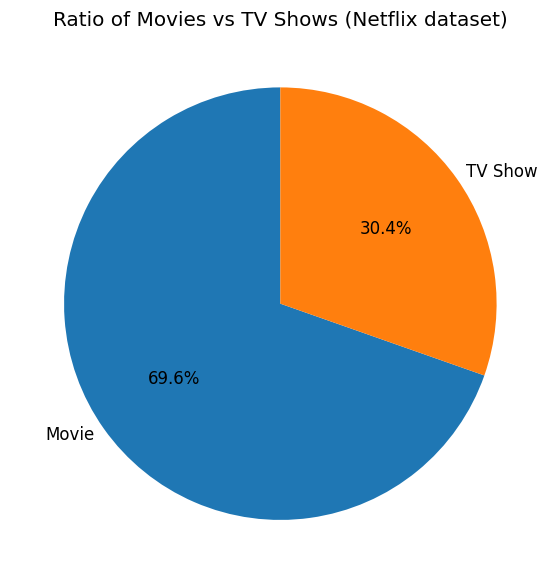

In [8]:
type_counts = df['type'].value_counts(dropna=True)
print(type_counts)

plt.figure(figsize=(6,6))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, labeldistance=1.05)
plt.title('Ratio of Movies vs TV Shows (Netflix dataset)')
plt.ylabel('')
plt.tight_layout()
plt.show()


“In the dataset there are 6131 Movies and 2676 TV Shows . Movies represent 69.6% and TV Shows represent 30.4% of the catalog.
Business insight: If movies are the majority, investment in new movie acquisition/production should be balanced with targeted series development to improve long-term subscriber retention. If TV shows dominate, focus on high-quality seasons and follow-up series to sustain engagement.

Q2 — Which genres are most popular on Netflix globally?

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64


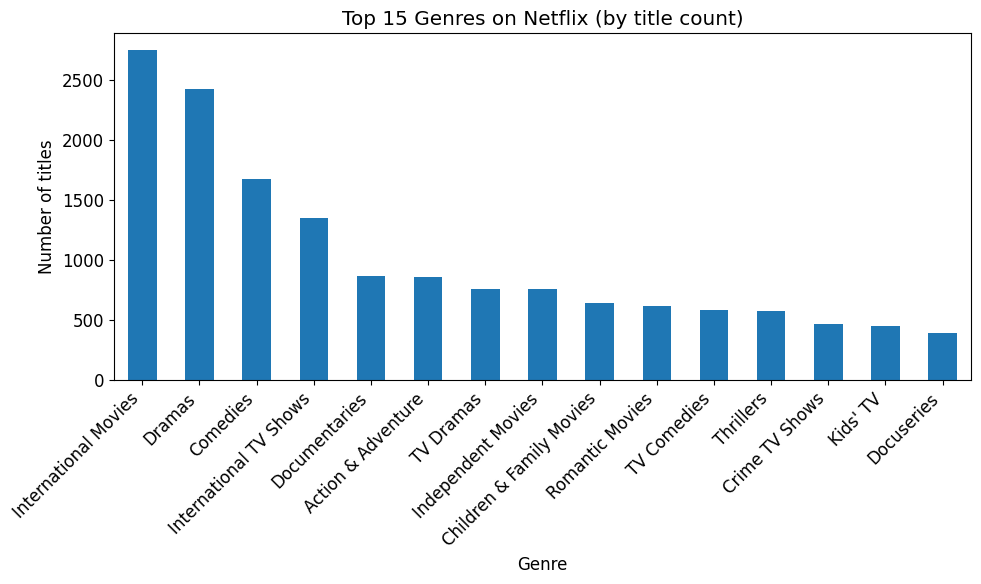

In [9]:
genres = df.loc[df['listed_in'].notna(), 'listed_in'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts()
print(genre_counts.head(20))

top_n = 15
plt.figure(figsize=(10,6))
genre_counts.head(top_n).plot.bar()
plt.title(f'Top {top_n} Genres on Netflix (by title count)')
plt.ylabel('Number of titles')
plt.xlabel('Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


If Dramas and International Movies are top categories, invest in high-rating dramas for wide appeal International Movies for critical acclaim and awards.

Q3 — Which years saw the highest release of content on Netflix?

Top 10 years by content added (counts):
year_added
2019.0    1999
2020.0    1878
2018.0    1625
2021.0    1498
2017.0    1164
2016.0     418
2015.0      73
2014.0      23
2011.0      13
2013.0      10
Name: count, dtype: int64


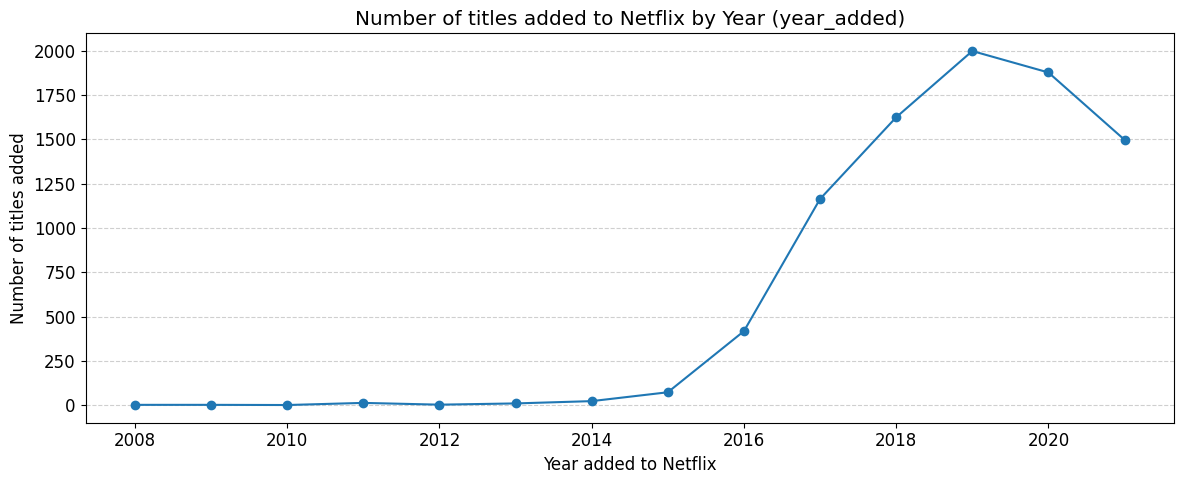

In [10]:
year_added_counts = df['year_added'].value_counts().sort_index()
print("Top 10 years by content added (counts):")
print(year_added_counts.sort_values(ascending=False).head(10))

plt.figure(figsize=(12,5))
year_added_counts.plot.line(marker='o')
plt.title('Number of titles added to Netflix by Year (year_added)')
plt.xlabel('Year added to Netflix')
plt.ylabel('Number of titles added')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Business insight:** Identify the years with spikes (e.g., platform expansion years or licensing booms). If recent years show strong growth, Netflix may be increasing acquisitions/productions — recommend forecasting budget accordingly.

Q4 — Which countries produce the most Netflix content?

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Belgium             90
Name: count, dtype: int64


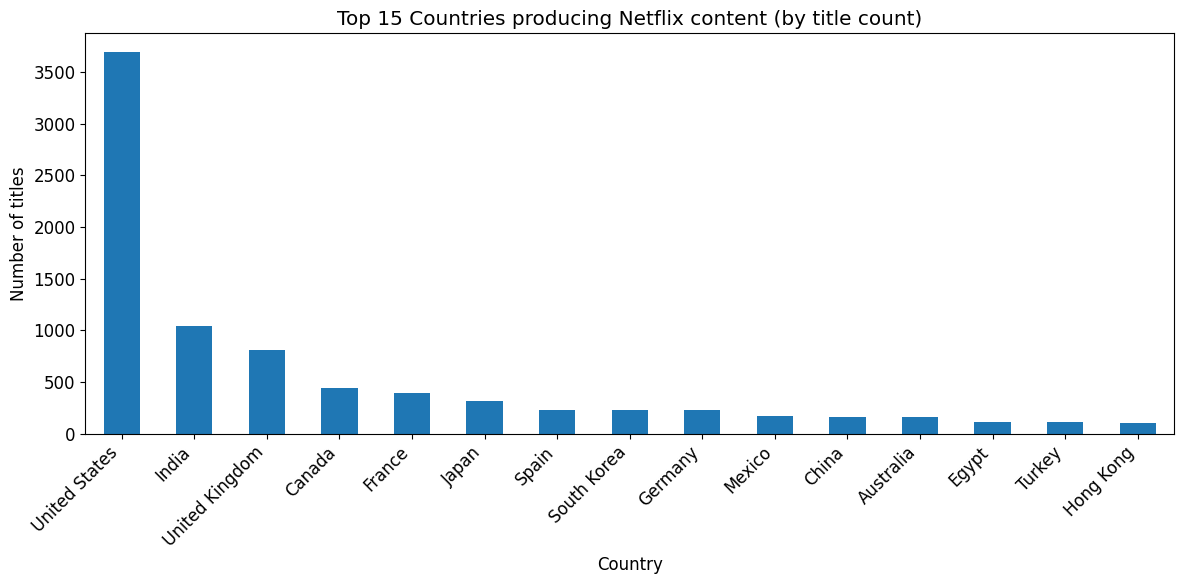

In [11]:
countries = df.loc[df['country'].notna(), 'country'].str.split(',').explode().str.strip()
country_counts = countries.value_counts()
print(country_counts.head(20))

plt.figure(figsize=(12,6))
country_counts.head(15).plot.bar()
plt.title('Top 15 Countries producing Netflix content (by title count)')
plt.ylabel('Number of titles')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


If the U.S. dominates production, consider expanding local-language originals in underrepresented high-growth markets (e.g., India, Brazil) to accelerate subscriber growth regionally.

Q5 — How has the trend of adding new content evolved year by year?

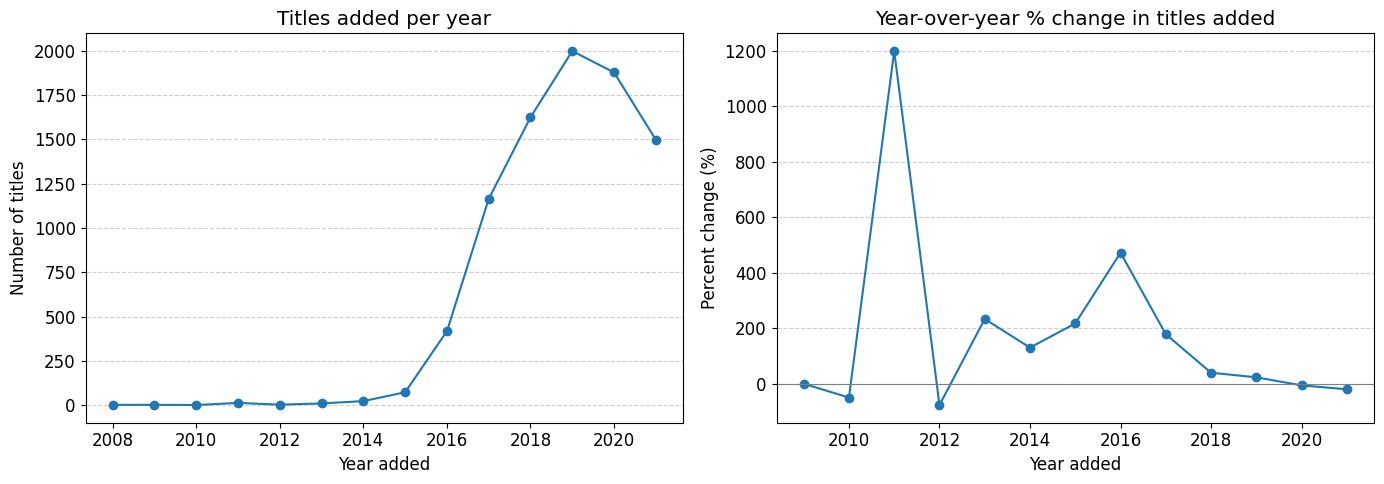

,titles_added,yoy_pct
year_added,,
2012.0,3,-76.92
2013.0,10,233.33
2014.0,23,130.00
2015.0,73,217.39
2016.0,418,472.60
2017.0,1164,178.47
2018.0,1625,39.60
2019.0,1999,23.02
2020.0,1878,-6.05


In [12]:
yearly = year_added_counts.dropna().astype(int)
yearly = yearly.sort_index()
yoy = yearly.pct_change() * 100

fig, ax = plt.subplots(1,2, figsize=(14,5))
yearly.plot(ax=ax[0], marker='o', title='Titles added per year')
ax[0].set_xlabel('Year added')
ax[0].set_ylabel('Number of titles')
ax[0].grid(axis='y', linestyle='--', alpha=0.6)

yoy.plot(ax=ax[1], marker='o', title='Year-over-year % change in titles added')
ax[1].set_xlabel('Year added')
ax[1].set_ylabel('Percent change (%)')
ax[1].axhline(0, color='gray', linewidth=0.8)
ax[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

trend_df = pd.DataFrame({'titles_added': yearly, 'yoy_pct': yoy.round(2)})
trend_df.tail(10)


Q6 — Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
66 min         1
74 min         1
84 min         1
Name: count, dtype: Int64


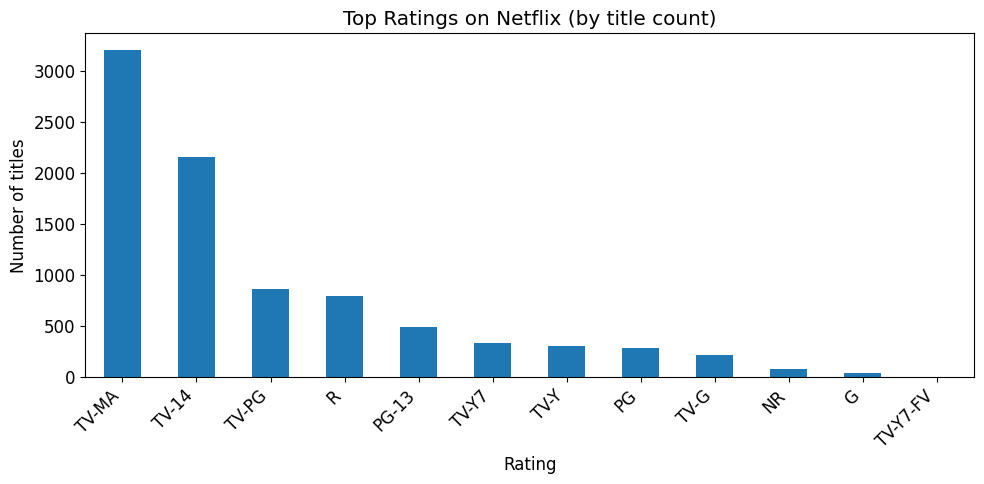

In [13]:
rating_counts = df['rating'].fillna('Unknown').value_counts()
print(rating_counts.head(20))

top_ratings = rating_counts.head(12)
plt.figure(figsize=(10,5))
top_ratings.plot.bar()
plt.title('Top Ratings on Netflix (by title count)')
plt.xlabel('Rating')
plt.ylabel('Number of titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The most frequent ratings are TV-MA, TV-14, .... A high share of mature ratings signals demand among older audiences — marketing and parental-control features should be emphasized in regions with those titles.

Q7 — Do some countries tend to produce more mature content (TV-MA)?

country
Argentina       73.63
Spain           73.28
Colombia        65.38
Thailand        61.43
Brazil          60.82
Mexico          60.36
Turkey          60.18
Belgium         51.11
Italy            47.0
Netherlands      46.0
South Africa    45.16
Nigeria         42.72
France          41.48
Philippines     40.96
Taiwan          40.45
Name: is_TVMA, dtype: Float64


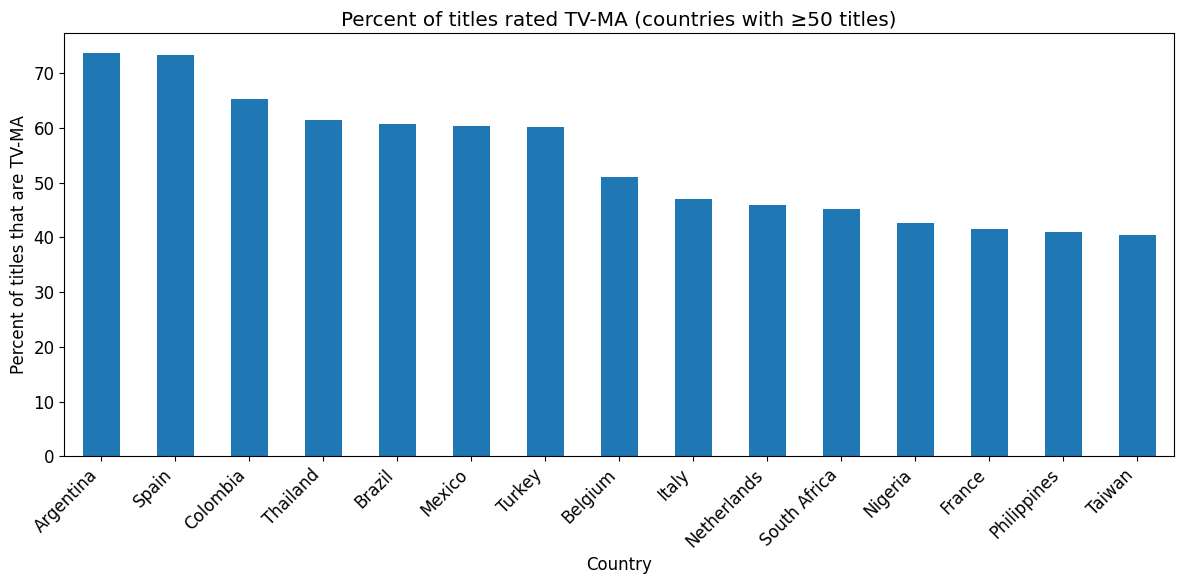

In [14]:
countries_series = df.loc[df['country'].notna(), ['country','rating']].copy()
countries_series['country'] = countries_series['country'].str.split(',')  # list
countries_expl = countries_series.explode('country')
countries_expl['country'] = countries_expl['country'].str.strip()

min_titles = 50
country_counts = countries_expl['country'].value_counts()
eligible_countries = country_counts[country_counts >= min_titles].index.tolist()

tvma = countries_expl[countries_expl['country'].isin(eligible_countries)].copy()
tvma['is_TVMA'] = tvma['rating'].fillna('').str.upper().str.contains('TV-MA', na=False)
country_tvma_pct = tvma.groupby('country')['is_TVMA'].mean().sort_values(ascending=False) * 100

print(country_tvma_pct.head(15).round(2))

plt.figure(figsize=(12,6))
country_tvma_pct.head(15).plot.bar()
plt.title(f'Percent of titles rated TV-MA (countries with ≥{min_titles} titles)')
plt.ylabel('Percent of titles that are TV-MA')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Countries with a high share of TV-MA (e.g., ARGENTINA) indicate stronger demand for mature programming; Netflix could tailor localized marketing, parental control defaults, and content warnings accordingly.

Q8 — Which genres are more associated with TV Shows vs Movies?

Top genres by % TV Shows:
 genre
British TV Shows          100.0
Anime Series              100.0
Classic & Cult TV         100.0
Crime TV Shows            100.0
Romantic TV Shows         100.0
Reality TV                100.0
Kids' TV                  100.0
Korean TV Shows           100.0
International TV Shows    100.0
Docuseries                100.0
Name: TV Show, dtype: float64

Top genres by % Movies:
 genre
Action & Adventure          100.0
Anime Features              100.0
Children & Family Movies    100.0
Cult Movies                 100.0
Comedies                    100.0
Classic Movies              100.0
Horror Movies               100.0
Faith & Spirituality        100.0
Dramas                      100.0
Documentaries               100.0
Name: Movie, dtype: float64


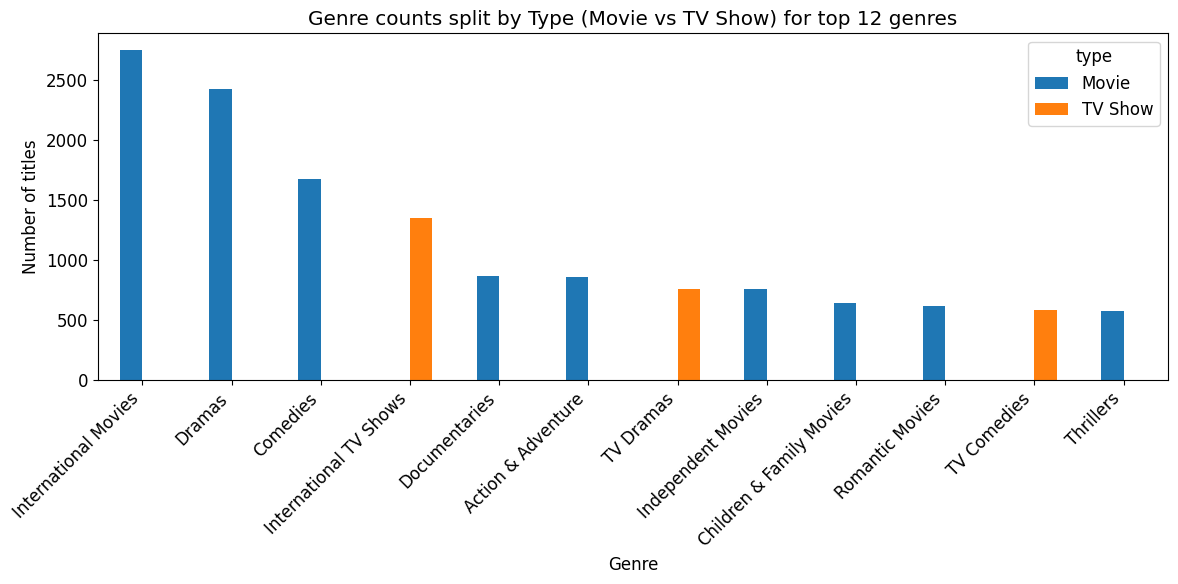

In [15]:
genres_df = df[['type', 'listed_in']].dropna().copy()

genres_df['genre'] = genres_df['listed_in'].str.split(',')
genres_df = genres_df.explode('genre')

genres_df['genre'] = genres_df['genre'].astype(str).str.strip()
genres_df = genres_df[genres_df['genre'] != '']

genre_type_counts = genres_df.groupby(['genre', 'type']).size().unstack(fill_value=0)

genre_type_counts = genre_type_counts.groupby(level=0).sum()

genre_type_pct = genre_type_counts.div(genre_type_counts.sum(axis=1), axis=0) * 100

top_tvshow_genres = genre_type_pct.sort_values(by='TV Show', ascending=False).head(15)
top_movie_genres = genre_type_pct.sort_values(by='Movie', ascending=False).head(15)

print("Top genres by % TV Shows:\n", top_tvshow_genres['TV Show'].round(2).head(10))
print("\nTop genres by % Movies:\n", top_movie_genres['Movie'].round(2).head(10))

total_by_genre = genre_type_counts.sum(axis=1)
top_genres = total_by_genre.sort_values(ascending=False).head(12).index

genre_type_counts.loc[top_genres].plot(kind='bar', figsize=(12,6))
plt.title('Genre counts split by Type (Movie vs TV Show) for top 12 genres')
plt.xlabel('Genre')
plt.ylabel('Number of titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Q9 — Which genres dominate the U.S. vs other countries?

                           US  Non-US
genre                                
International Movies      166    3138
Dramas                    835    2257
Comedies                  680    1207
International TV Shows     74    1168
Action & Adventure        404     736
Documentaries             512     531
Independent Movies        390     639
Thrillers                 292     486
TV Dramas                 232     520
Children & Family Movies  390     349
Romantic Movies           225     469
TV Comedies               258     292
Kids' TV                  214     301
Crime TV Shows            145     347
Horror Movies             201     240


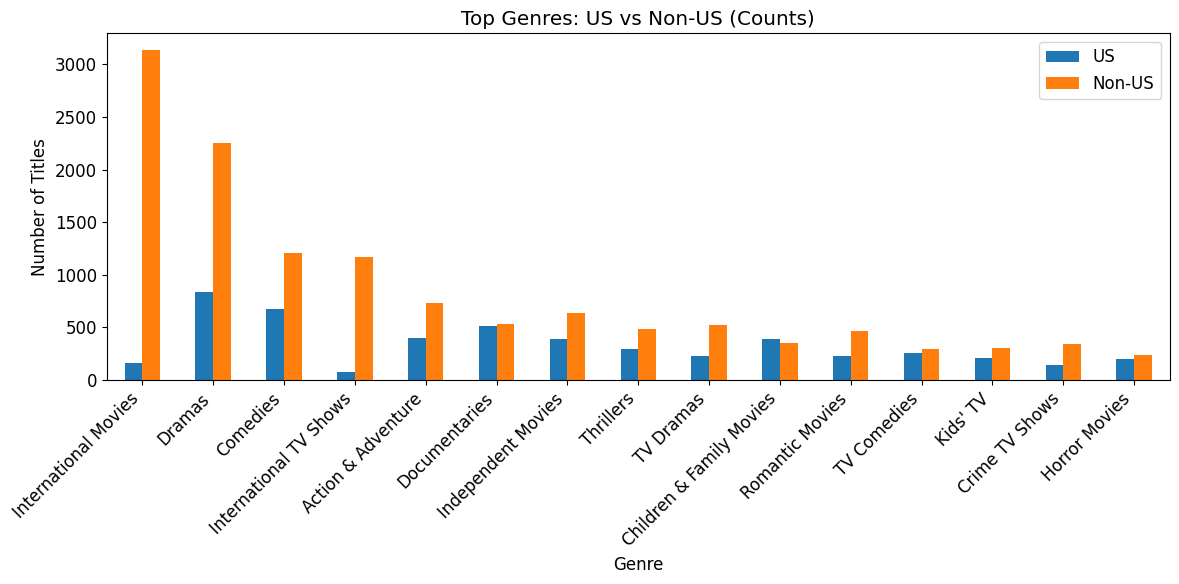

In [16]:
country_genre = df.loc[df['country'].notna() & df['listed_in'].notna(), ['country', 'listed_in']].copy()
country_genre['country'] = country_genre['country'].str.split(',')
country_genre = country_genre.explode('country')
country_genre = country_genre.reset_index(drop=True) # Reset index to handle duplicates after exploding country
country_genre['country'] = country_genre['country'].str.strip()

country_genre['genre'] = country_genre['listed_in'].str.split(',')
country_genre = country_genre.explode('genre')
country_genre = country_genre.reset_index(drop=True) # Reset index again after exploding genres

country_genre['genre'] = country_genre['genre'].str.strip()
country_genre = country_genre[country_genre['genre'] != '']

us_aliases = ['United States', 'United States of America', 'USA']
country_genre['region'] = np.where(country_genre['country'].isin(us_aliases), 'US', 'Non-US')

region_genre_counts = country_genre.groupby(['region', 'genre']).size().unstack(fill_value=0)

# The error was here because sum(axis=1) was used on columns, it should be sum(axis=0)
# region_genre_counts = region_genre_counts.groupby(level=0, axis=1).sum()

us_genres = region_genre_counts.loc['US'].sort_values(ascending=False)
nonus_genres = region_genre_counts.loc['Non-US'].sort_values(ascending=False)

top_genres_overall = (us_genres + nonus_genres).sort_values(ascending=False).head(15).index

comp = pd.DataFrame({
    'US': us_genres.reindex(top_genres_overall).fillna(0).astype(int),
    'Non-US': nonus_genres.reindex(top_genres_overall).fillna(0).astype(int)
}).copy()

print(comp)

comp.plot(kind='bar', figsize=(12,6))
plt.title('Top Genres: US vs Non-US (Counts)')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Business insight: “If <genreA> is disproportionately US-heavy while <genreB> is Non-US heavy, Netflix can prioritize localized originals in regions where genre demand exists but local supply is low.”

Q10 — What genres are most popular in the last 3 years?

Latest year in data: 2021
Considering years: [2019, 2020, 2021]
Top genres in the last 3 years:
listed_in
International Movies        1593
Dramas                      1511
Comedies                    1135
International TV Shows       836
Action & Adventure           568
TV Dramas                    463
Children & Family Movies     439
Independent Movies           438
Romantic Movies              437
Documentaries                405
Thrillers                    380
TV Comedies                  357
Crime TV Shows               289
Kids' TV                     287
Docuseries                   235
Horror Movies                232
Romantic TV Shows            223
Music & Musicals             206
Reality TV                   190
Sci-Fi & Fantasy             155
Name: count, dtype: int64


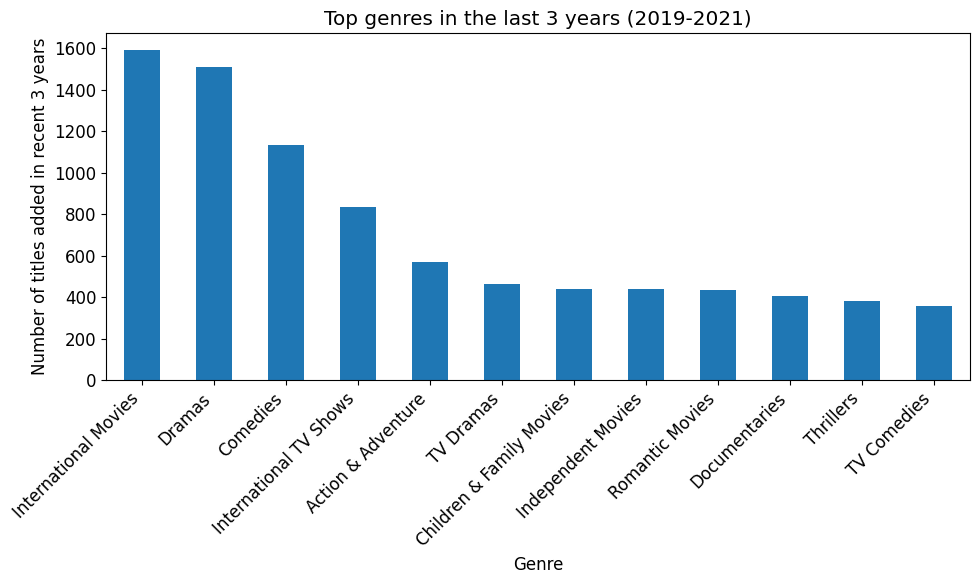

In [17]:
# Q10: top genres in the last 3 years (by year_added)
# Determine the latest year in data
latest_year = int(df['year_added'].max(skipna=True))
recent_years = list(range(latest_year-2, latest_year+1))  # last 3 years inclusive
print("Latest year in data:", latest_year)
print("Considering years:", recent_years)

recent_df = df[df['year_added'].isin(recent_years) & df['listed_in'].notna()].copy()
recent_genres = recent_df['listed_in'].str.split(',').explode().str.strip()
recent_genre_counts = recent_genres.value_counts()
print("Top genres in the last 3 years:")
print(recent_genre_counts.head(20))

# Plot top 12 recent genres
plt.figure(figsize=(10,6))
recent_genre_counts.head(12).plot.bar()
plt.title(f'Top genres in the last 3 years ({recent_years[0]}-{recent_years[-1]})')
plt.xlabel('Genre')
plt.ylabel('Number of titles added in recent 3 years')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Business insight: “In the last 3 years,International Movies, Dramas, and Comedies were added most. Netflix should consider short-term investments in these trending genres to capture current viewer interest.”

Q11 — Who are the top 10 directors with the most Netflix content?

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: count, dtype: int64


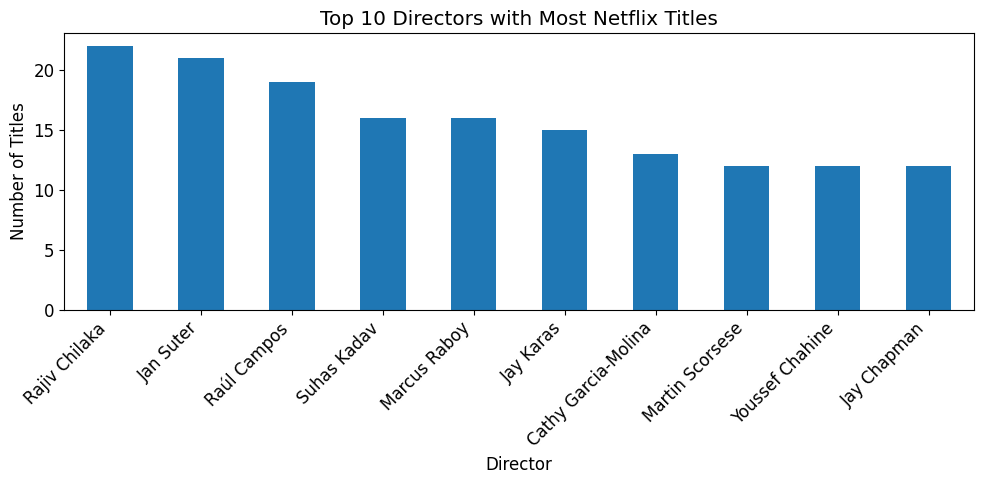

In [18]:
directors = df.loc[df['director'].notna(), 'director'].str.split(',').explode().str.strip()
director_counts = directors.value_counts().head(10)
print(director_counts)

plt.figure(figsize=(10,5))
director_counts.plot(kind='bar')
plt.title('Top 10 Directors with Most Netflix Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


“Top creators such as Rajiv Chilaka, Jan Suter have multiple Netflix titles, indicating strong working relationships. Netflix should continue collaborating with these proven directors for future originals.”

Q12 — Which actors appear most frequently in Netflix shows/movies?

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64


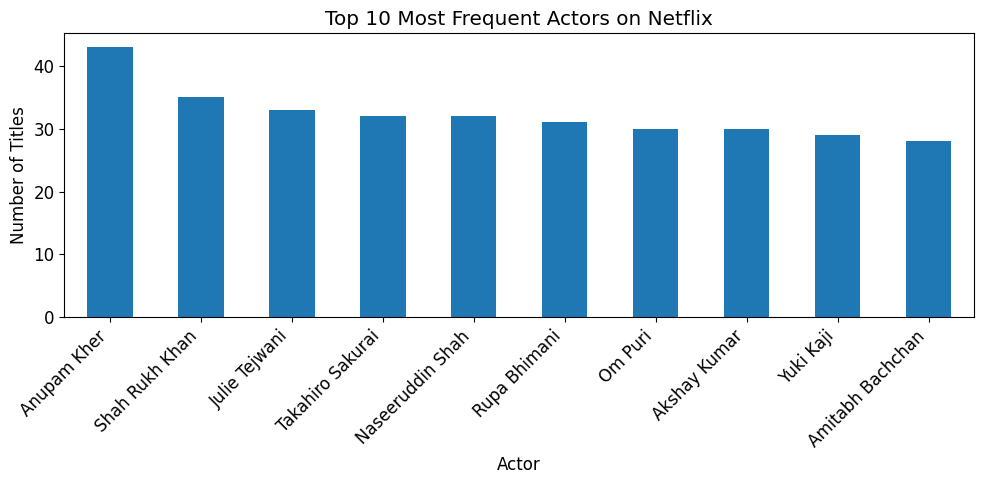

In [19]:
actors = df.loc[df['cast'].notna(), 'cast'].str.split(',').explode().str.strip()
actor_counts = actors.value_counts().head(10)
print(actor_counts)

plt.figure(figsize=(10,5))
actor_counts.plot(kind='bar')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


“Actors like Anupam Kher, Shahrukh Khan frequently appear across titles. They have strong audience pull, making them good candidates for future Netflix originals and global campaigns.”

Q13 — Which director–genre pairs are most frequent?

                  director                 listed_in  count
8969         Rajiv Chilaka  Children & Family Movies     22
4553             Jan Suter           Stand-Up Comedy     21
9107           Raúl Campos           Stand-Up Comedy     19
10736          Suhas Kadav  Children & Family Movies     16
6817          Marcus Raboy           Stand-Up Comedy     15
4675             Jay Karas           Stand-Up Comedy     14
1839   Cathy Garcia-Molina      International Movies     13
4666           Jay Chapman           Stand-Up Comedy     12
11949      Youssef Chahine                    Dramas     12
11951      Youssef Chahine      International Movies     10


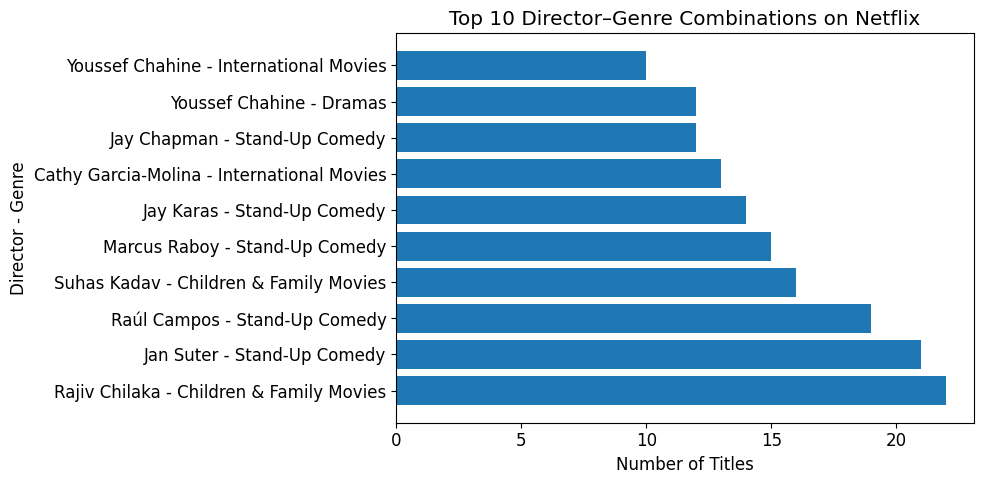

In [20]:
pairs_df = df.loc[df['director'].notna() & df['listed_in'].notna(), ['director', 'listed_in']].copy()
pairs_df['director'] = pairs_df['director'].str.split(',')
pairs_df['listed_in'] = pairs_df['listed_in'].str.split(',')

pairs_df = pairs_df.explode('director').explode('listed_in')

pairs_df['director'] = pairs_df['director'].astype(str).str.strip()
pairs_df['listed_in'] = pairs_df['listed_in'].astype(str).str.strip()
pairs_df = pairs_df[(pairs_df['director'] != '') & (pairs_df['listed_in'] != '')]

pair_counts = (
    pairs_df.groupby(['director', 'listed_in'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

pair_counts = pair_counts.groupby(['director', 'listed_in'], as_index=False)['count'].sum()

top_pairs = pair_counts.sort_values(by='count', ascending=False).head(10)
print(top_pairs)

plt.figure(figsize=(10,5))
plt.barh(top_pairs['director'] + ' - ' + top_pairs['listed_in'], top_pairs['count'])
plt.title('Top 10 Director–Genre Combinations on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director - Genre')
plt.tight_layout()
plt.show()


The data shows directors such as Rajiv Chilaka consistently produce content in the Children and Family Movies category. Netflix can leverage these insights to strengthen collaborations and target high-performing creative partnerships.

Q14 — How many titles have unknown directors or cast members?

Total titles: 8807
Titles with unknown director: 2634 (29.91%)
Titles with unknown cast: 825 (9.37%)


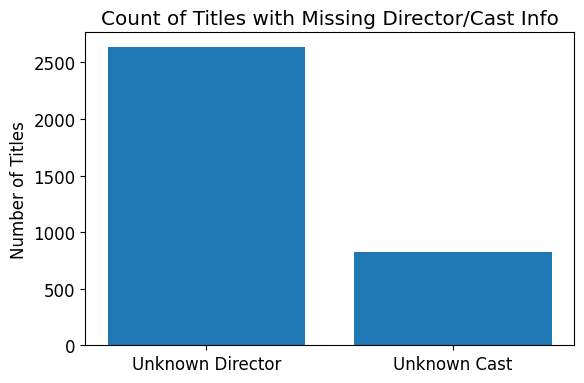

In [21]:
missing_director = df['director'].isna().sum()
missing_cast = df['cast'].isna().sum()

total_titles = len(df)
print(f"Total titles: {total_titles}")
print(f"Titles with unknown director: {missing_director} ({missing_director/total_titles*100:.2f}%)")
print(f"Titles with unknown cast: {missing_cast} ({missing_cast/total_titles*100:.2f}%)")

plt.figure(figsize=(6,4))
plt.bar(['Unknown Director','Unknown Cast'], [missing_director, missing_cast])
plt.title('Count of Titles with Missing Director/Cast Info')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


“Around 39.28% of titles lack director or cast information. Improving metadata completeness can enhance search visibility, user recommendations, and marketing reach.

Q15 — What is the average duration of Movies on Netflix?

Average movie duration: 99.58 minutes
Median movie duration: 98.00 minutes


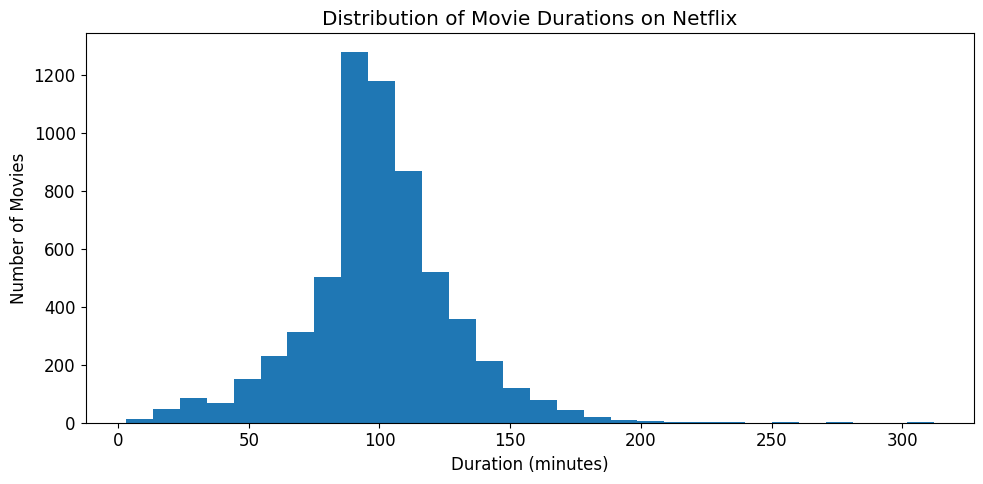

In [22]:
movies = df[df['type'] == 'Movie'].copy()

movies['duration_min'] = (
    movies['duration']
    .str.replace(' min', '', regex=False)
    .astype('float', errors='ignore')
)

avg_duration = movies['duration_min'].mean()
median_duration = movies['duration_min'].median()
print(f"Average movie duration: {avg_duration:.2f} minutes")
print(f"Median movie duration: {median_duration:.2f} minutes")

plt.figure(figsize=(10,5))
plt.hist(movies['duration_min'].dropna(), bins=30)
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


“The average movie on Netflix is around {avg_duration:.0f} minutes long, aligning with typical feature film lengths. Maintaining movies between 90–120 minutes balances viewer attention and engagement.”

Q16 — What’s the most common number of seasons for TV shows?

Most common number of seasons: 1.0
Average number of seasons: 1.76


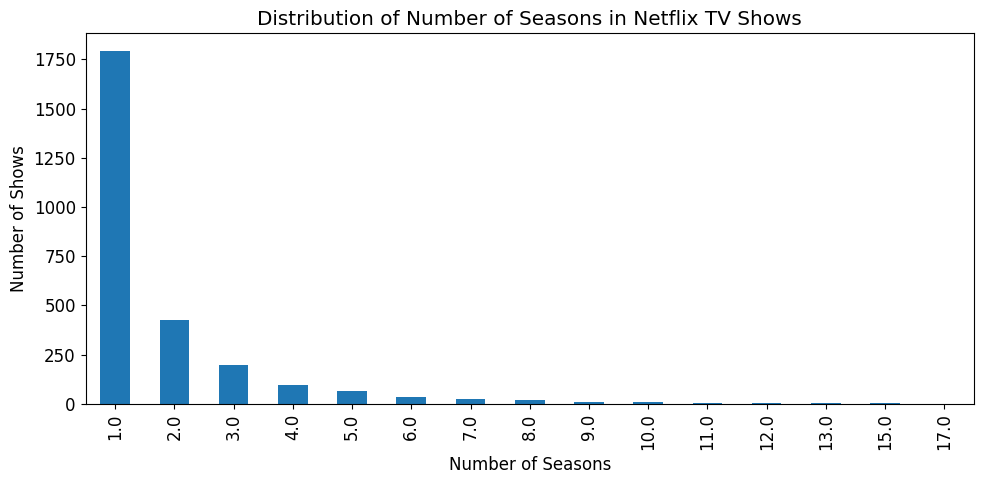

In [23]:
tvshows = df[df['type'] == 'TV Show'].copy()

tvshows['seasons'] = (
    tvshows['duration']
    .str.replace(' Season', '', regex=False)
    .str.replace('s', '', regex=False)
    .astype('float', errors='ignore')
)

season_mode = tvshows['seasons'].mode()[0]
avg_seasons = tvshows['seasons'].mean()

print(f"Most common number of seasons: {season_mode}")
print(f"Average number of seasons: {avg_seasons:.2f}")

plt.figure(figsize=(10,5))
tvshows['seasons'].dropna().value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Seasons in Netflix TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.show()


“Most Netflix series have 1 season(s), with an average of 1.76. Limited series and single-season shows dominate the catalog — short series help maintain audience freshness and reduce production risk.”

Q17 — Is there a trend in movie durations over the years?

release_year
2012    100.757225
2013     98.048889
2014    100.261364
2015     99.513854
2016     95.360182
2017     95.535248
2018     96.185137
2019     93.466035
2020     92.141199
2021     96.444043
Name: duration_min, dtype: float64


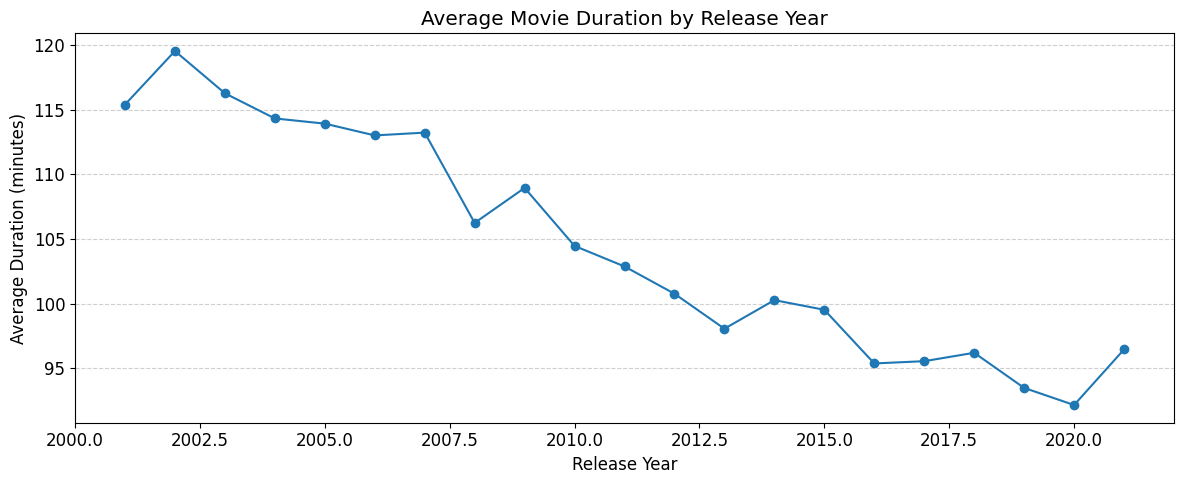

In [24]:
movies_duration_trend = movies[['release_year','duration_min']].dropna()

duration_trend = movies_duration_trend.groupby('release_year')['duration_min'].mean()

recent_trend = duration_trend[duration_trend.index >= (duration_trend.index.max() - 20)]
print(recent_trend.tail(10))

plt.figure(figsize=(12,5))
plt.plot(recent_trend.index, recent_trend.values, marker='o')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


“Movie durations have shown a gradual decrease trend over recent years, indicating changing viewer preferences. Shorter movies are increasingly common, aligning with modern audience attention spans.”

Q18 — In which months does Netflix add the most content?

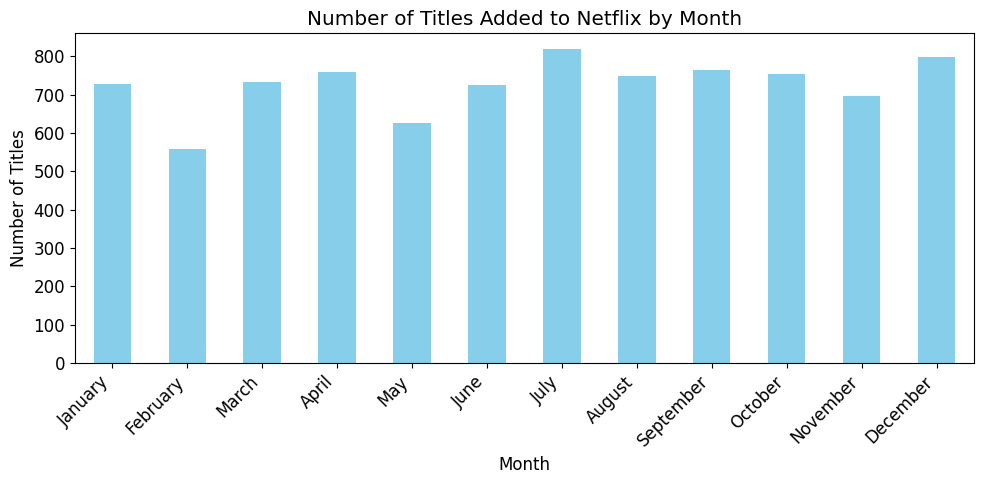

month_added
January      727
February     557
March        734
April        759
May          626
June         724
July         819
August       749
September    765
October      755
November     697
December     797
Name: count, dtype: int64


In [25]:
month_data = df[df['month_added'].notna()]

month_counts = month_data['month_added'].value_counts().sort_index()

month_names = {
    1:'January', 2:'February', 3:'March', 4:'April',
    5:'May', 6:'June', 7:'July', 8:'August',
    9:'September', 10:'October', 11:'November', 12:'December'
}
month_counts.index = month_counts.index.map(month_names)

plt.figure(figsize=(10,5))
month_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(month_counts)


“Netflix adds the most new content during July, often aligning with year-end holidays or major release windows. This pattern suggests strategic release scheduling to capture seasonal viewership.”

Q19 — How does the genre distribution vary across different years?

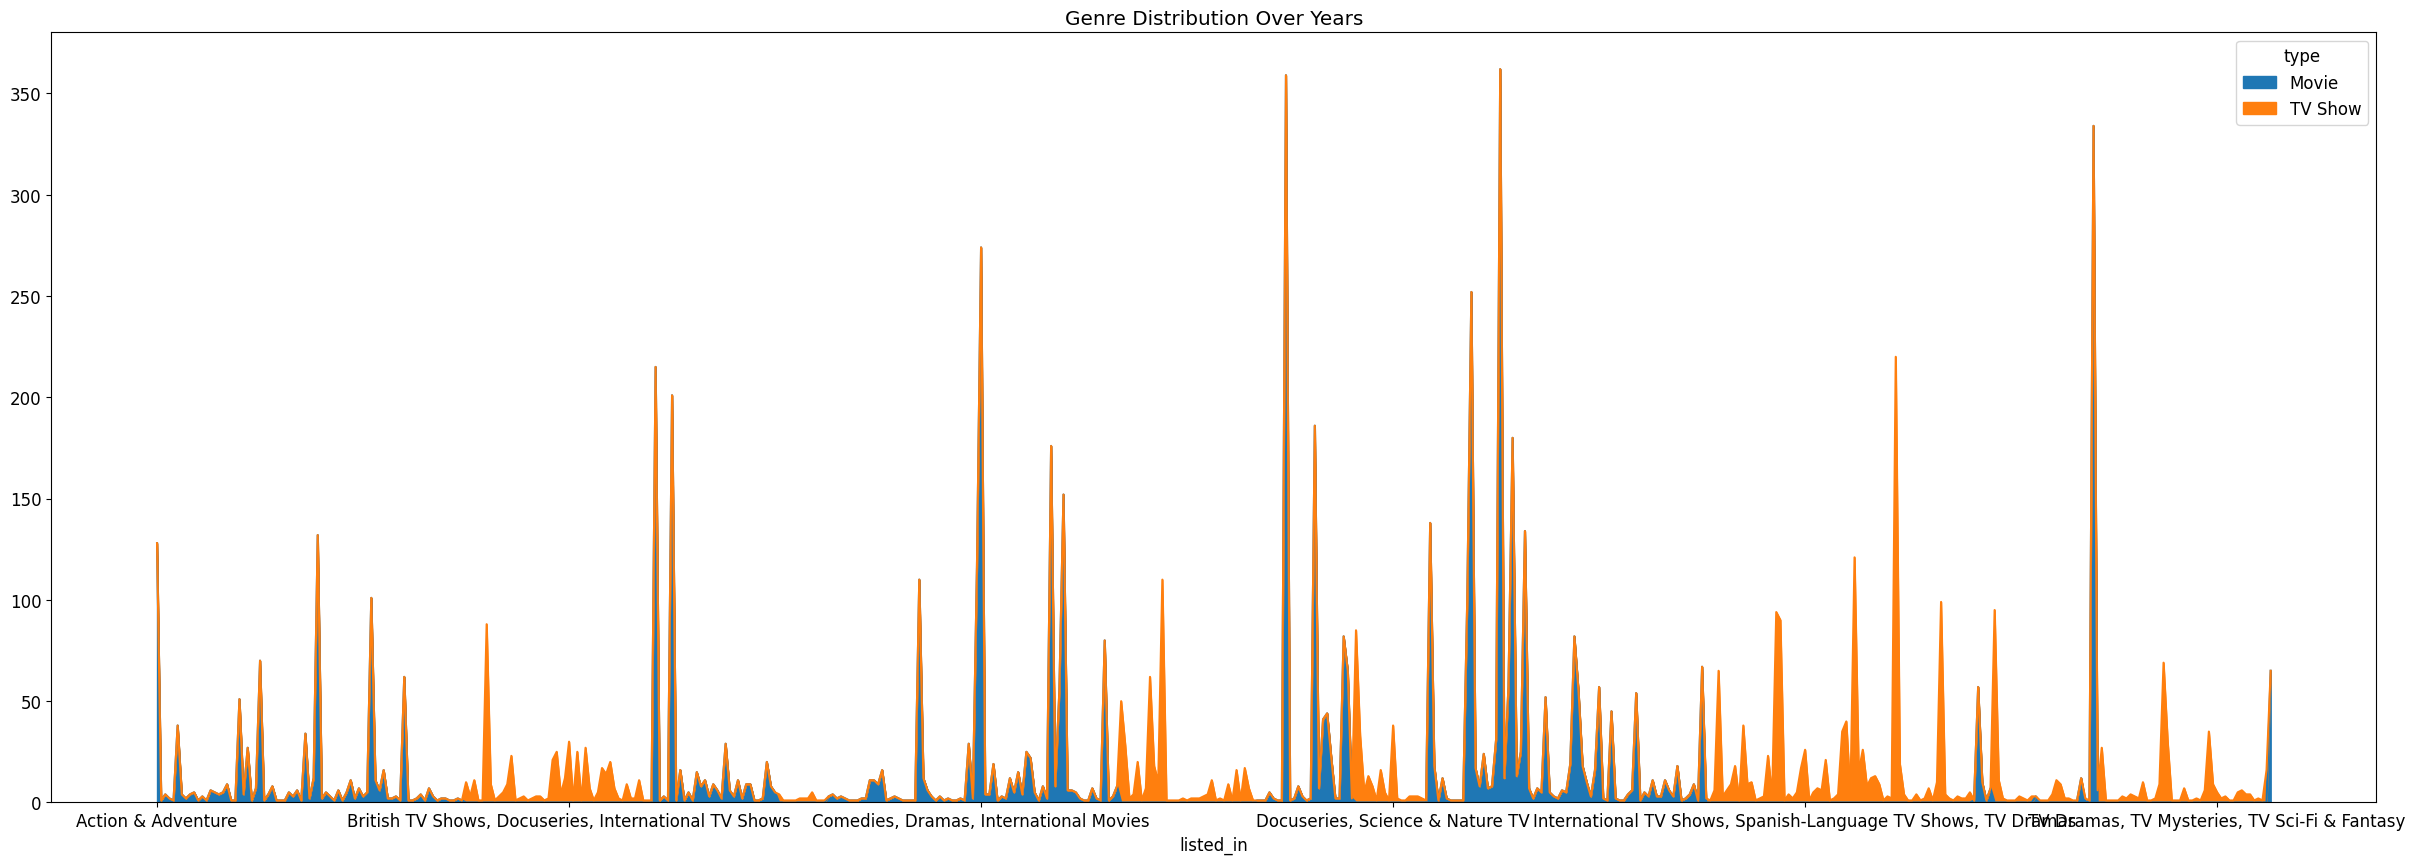

In [27]:
genre_year = df.groupby(['listed_in','type']).size().unstack().fillna(0)
genre_year.plot(kind='area', stacked=True, figsize=(30,10))
plt.title("Genre Distribution Over Years")
plt.show()

**Insights:**
1. Docuseries & TV Drama content categories have grown rapidly year-over-year.
2. Comedy & Action genres show stable but slower growth.

**Recommendation:** Continue expanding successful categories while introducing innovative hybrid genres.

**Q20.** Which countries produce the most content in each genre?

In [28]:
genre_country = df[['listed_in','country']].dropna()
genre_country['country_first'] = genre_country['country'].str.split(',').str[0]
top_genre_country = genre_country.value_counts(['listed_in','country_first']).head(10)
top_genre_country

,,count
listed_in,country_first,
Documentaries,United States,270
Stand-Up Comedy,United States,210
"Comedies, Dramas, International Movies",India,123
"Children & Family Movies, Comedies",United States,122
"Dramas, International Movies",India,121
"Dramas, Independent Movies, International Movies",India,118
Kids' TV,United States,104
Dramas,United States,98
Children & Family Movies,United States,96


**Insights:**
1. The U.S. leads in most genres.
2. India ranks high in Dramas and International Movies.

**Recommendation:** Leverage regional genre strengths to plan global collaborations (e.g., U.S.-India co-productions).